# Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import collections

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head(2)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [3]:
filter = data.iloc[0:5, 1:5]
# filtr = data.values[0:5, 1:5] return as array
filter

,Gender,Height,Weight,CALC
0,Female,1.62,64.0,no
1,Female,1.52,56.0,Sometimes
2,Male,1.80,77.0,Frequently
3,Male,1.80,87.0,Frequently
4,Male,1.78,89.8,Sometimes


In [4]:
data.family_history_with_overweight.nunique()

2

In [5]:
data.family_history_with_overweight.value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [6]:
col = ['family_history_with_overweight','Weight']
print(data[col].isnull().sum())

family_history_with_overweight    0
Weight                            0
dtype: int64


In [7]:
# data = data.sort_values(by='Weight')

In [8]:
encode = OneHotEncoder()  # sparse_output=False - will gives direct array type
encode_col = encode.fit_transform(data[['family_history_with_overweight']])
print(encode_col)
print(encode_col.toarray())

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (2086, 1)	1.0
  (2087, 1)	1.0
  (2088, 1)	1.0
  (2089, 1)	1.0
  (2090, 1)	1.0
  (2091, 1)	1.0
  (2092, 1)	1.0
  (2093, 1)	1.0
  (2094, 1)	1.0
  (2095, 1)	1.0
  (2096, 1)	1.0
  (2097, 1)	1.0
  (2098, 1)	1.0
  (2099, 1)	1.0
  (2100, 1)	1.0
  (2101, 1)	1.0
  (2102, 1)	1.0
  (2103, 1)	1.0
  (2104, 1)	1.0
  (2105, 1)	1.0
  (2106, 1)	1.0
  (2107, 1)	1.0
  (2108, 1)	1.0
  (2109, 1)	1.0
  (2110, 1)	1.0
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
prt_df = pd.DataFrame(encode_col.toarray(), columns=encode.get_feature_names_out())
prt_df.head(2)

,family_history_with_overweight_no,family_history_with_overweight_yes
0,0.0,1.0
1,0.0,1.0


In [10]:
label_encode = LabelEncoder()
y_encode = label_encode.fit_transform(data['family_history_with_overweight'])
y_encode

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
x = data[['Weight']]
y = y_encode
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
# print(y_train, y_test)

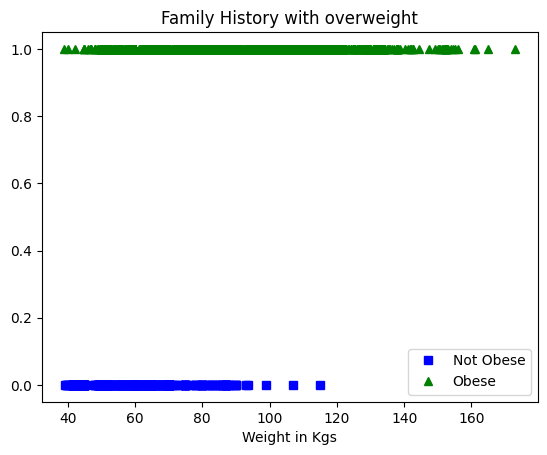

In [12]:
plt.plot(x[y==0], y[y==0], "bs", label='Not Obese')
plt.plot(x[y==1], y[y==1], "g^", label='Obese')
plt.xlabel('Weight in Kgs')
plt.title('Family History with overweight')
plt.legend()

(array([ 385.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1726.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

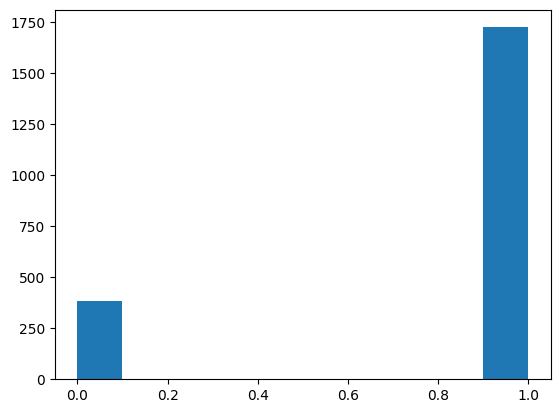

In [13]:
plt.hist(y)

(423, 2)


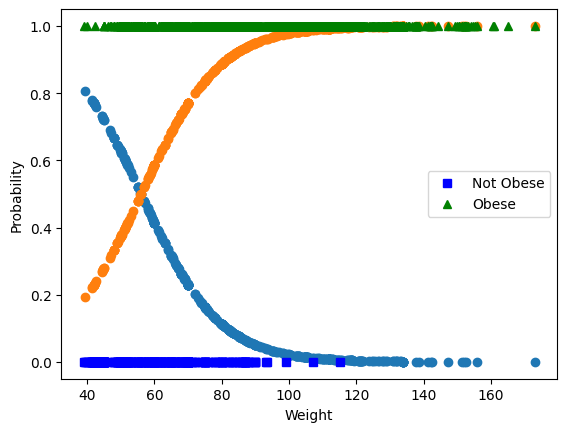

In [14]:
reg = LogisticRegression(random_state=10)
reg.fit(x_train, y_train)
y_proba = reg.predict_proba(x_test)
print(y_proba.shape)

plt.scatter(x_test,y_proba[:, 0])
plt.scatter(x_test, y_proba[:, 1])
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.plot(x[y==0], y[y==0], "bs", label='Not Obese')
plt.plot(x[y==1], y[y==1], "g^", label = 'Obese')
plt.legend()

In [15]:
y_predict = reg.predict(x_test)
# print(y_test, y_predict)
# plt.scatter(y_test, y_predict)

In [16]:
unique, count = np.unique(y_test, return_counts=True)
print(unique, count)

[0 1] [ 68 355]


In [17]:
print(collections.Counter(y_test))

Counter({1: 355, 0: 68})


In [18]:
print(confusion_matrix(y_test, y_predict))

[[ 36  32]
 [ 19 336]]


In [19]:
from IPython.display import Image

Image(url="Confusion matrix.png", width=500, height=500)

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.53      0.59        68
           1       0.91      0.95      0.93       355

    accuracy                           0.88       423
   macro avg       0.78      0.74      0.76       423
weighted avg       0.87      0.88      0.87       423



In [21]:
sgd = SGDClassifier(random_state=10)
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)

In [22]:
print(confusion_matrix(y_test, pred))

[[ 37  31]
 [ 23 332]]


In [23]:
scores = cross_val_score(sgd, x_train, y_train, cv=4, scoring='accuracy')
scores

array([0.83886256, 0.83886256, 0.8507109 , 0.84597156])

In [24]:
Image(url='Picture1.png',width=500,height=500)

In [25]:
y_scores = cross_val_predict(sgd, x_train, y_train, cv=3, method="decision_function")
# print(y_scores)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Text(0.5, 0, 'Threshold')

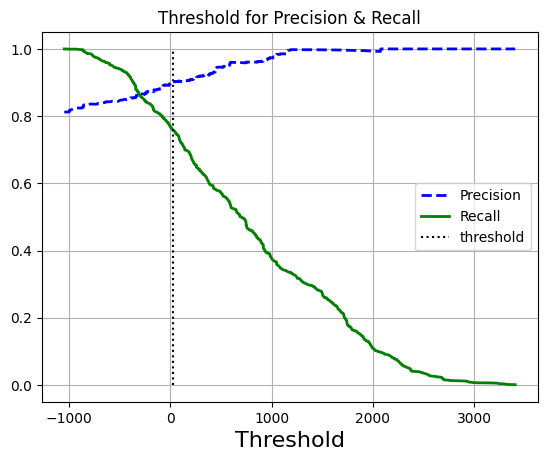

In [30]:
threshold = 30
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.title('Threshold for Precision & Recall')
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")\
plt.grid()
plt.legend(loc='center right')
plt.xlabel("Threshold", fontsize=16)    
# plt.axis([-1500,4000, 0,1.5])

0.7578409919766593
28.15119609218391


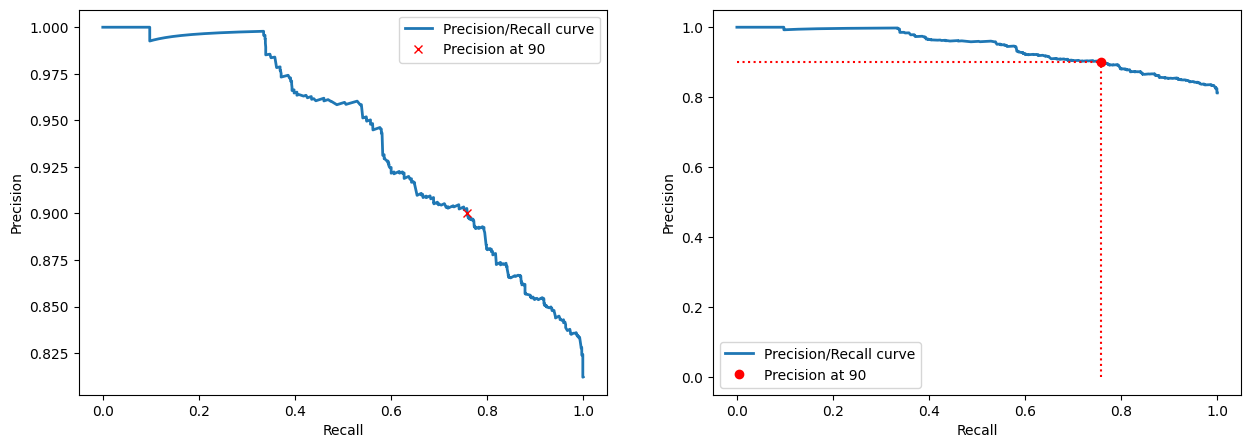

In [31]:
idx_for_90_precision = np.argmax(precisions >= 0.90)
recall_90_precision = recalls[idx_for_90_precision]
print(recall_90_precision)

threshold_90_precision = thresholds[idx_for_90_precision]
print(threshold_90_precision)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recall_90_precision], [0.9], "rx", label='Precision at 90')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
df = pd.DataFrame({'Precision':precisions,
                  'Recalls':recalls
                  })
# pd.set_option('display.max_row',None)
# print(df)

plt.subplot(122)
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro", label='Precision at 90')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [32]:
idx_for_90_precision = (precisions >= 0.97).argmax()
print(idx_for_90_precision)
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

782


959.734811259606

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds_val = roc_curve(y_train, y_scores)

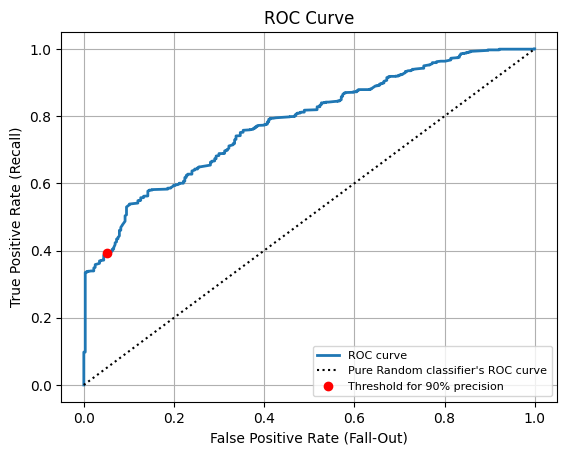

In [35]:
idx_for_threshold_at_90 = (thresholds_val <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Pure Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ro", label="Threshold for 90% precision")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right", fontsize=8)